# Simulación para el pronostico de feminicidios
La ausencia de un sistema integral de información que permita conocer el número de casos de los distintos tipos de violencia contra las mujeres, los cuales conforman la violencia feminicida, las características tanto de los hechos como de las víctimas y los agresores, la atención brindada, su eventual denuncia, sanción y reparación del daño, obliga a recurrir a pocas fuentes de datos.



Bibliotecas necesarias:

1. **pandas**: La librería `pandas` se utiliza para la manipulación y análisis de datos. En este caso, se utiliza para crear un DataFrame que almacena los datos históricos de años y números de feminicidios.

2. **numpy**: La librería `numpy` proporciona herramientas para el cálculo numérico en Python.

3. **matplotlib**: La librería `matplotlib` se utiliza para la visualización de gráficos en Python.

4. **sklearn.linear_model.LinearRegression**:  La clase `LinearRegression` proporciona herramientas para realizar regresión lineal. Se utiliza en este código para calcular la tendencia de los datos históricos mediante regresión lineal.

5. **simpy**: La librería `simpy` es una biblioteca de simulación de eventos discretos en Python. Se utiliza en este código para simular y proyectar los feminicidios en los años 2023 y 2024 basándose en la tendencia estimada.



In [ ]:
!pip install simpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import simpy

Utilizamos la regresión lineal para calcular la tendencia de los datos históricos. Creamos un modelo de regresión lineal y lo ajustamos utilizando los valores de los años (X) y los números de feminicidios (y). Luego, realizamos la predicción de la tendencia y generamos la ecuacion de la linea de regresión

In [ ]:
años = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
feminicidios = [412, 608, 742, 898, 941, 946, 981, 954]

df = pd.DataFrame({'Año': años, 'Feminicidios': feminicidios})

# Calcular la tendencia utilizando regresión lineal
X = df['Año'].values.reshape(-1, 1) # transforma los datos de una dimensión a una matriz de dos dimensiones
y = df['Feminicidios'].values.reshape(-1, 1)
regression_model = LinearRegression()
regression_model.fit(X, y)
trend = regression_model.predict(X)


y = regression_model.intercept_[0]
m = regression_model.coef_[0][0]
#print(f'Tendencia: y = {round(m, 2)}x + {round(y, 2)}')

#proyeccion_2023 = round(m * 2023 + y)
#proyeccion_2024 = round(m * 2024 + y)

Creamos un entorno de Simpy . Luego, definimos una función simular_feminicidios que simulará los feminicidios para los años 2023 y 2024. Utilizamos un bucle for para iterar a través de los años y calculamos la estimación de feminicidios utilizando la tendencia proyectada y el intercepto:

Estimación para 2023: 1148
Estimación para 2024: 1224


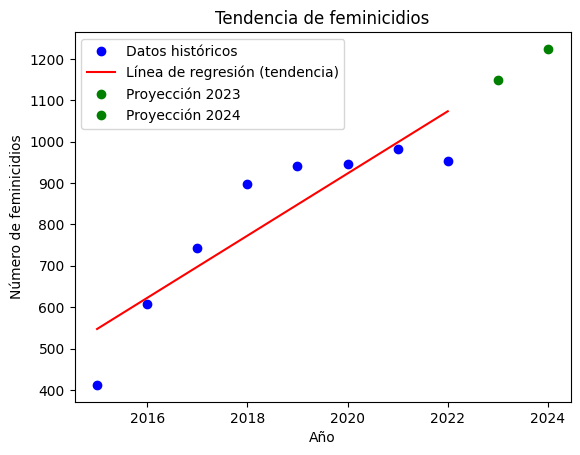

In [ ]:
# Crear entorno Simpy
env = simpy.Environment()

# Definir una función para la simulación de feminicidios
def simular_feminicidios(env, tendencia):
    for año in range(2023, 2025):
        estimacion = round(tendencia * año + y)
        print(f'Estimación para {año}: {estimacion}')
        yield env.timeout(1)

# Agregar el proceso de simulación al entorno Simpy
env.process(simular_feminicidios(env, m))

# Ejecutar la simulación
env.run()
# Visualizar los resultados
plt.plot(df['Año'], df['Feminicidios'], 'bo', label='Datos históricos')
plt.plot(df['Año'], trend, 'r-', label='Línea de regresión (tendencia)')
plt.plot(2023,proyeccion_2023, 'go', label='Proyección 2023')
plt.plot(2024, proyeccion_2024, 'go', label='Proyección 2024')
plt.title('Tendencia de feminicidios')
plt.xlabel('Año')
plt.ylabel('Número de feminicidios')
plt.legend()
plt.show()
